In [26]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [27]:
df_germ = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'Germany')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_germ = df_germ.dropna(subset=['salary_year_avg'])

df_germ_exploded = df_germ.explode('job_skills')

df_germ_exploded[['salary_year_avg', 'job_skills']].head(9)

,salary_year_avg,job_skills
1363,56700.0,spark
28997,56700.0,go
63195,90931.0,python
92781,139216.0,python
92781,139216.0,aws
92781,139216.0,azure
92781,139216.0,windows
92781,139216.0,linux
92781,139216.0,excel


### Calculate Percent of Job Postings that Have Skills
Group the data by job skills and calculates the count and median salary for each skill, sorting the results in descending order by count. It then renames the columns. Calculates the percentage that each skill count represents out of the total number ofScientisst jobs. Finally, filter out any skills that don't have any jobs associated with them.

In [28]:
df_germ_skills = df_germ_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_germ_skills = df_germ_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

Ds_job_count = len(df_germ)  # Find count of Data Scientist jobs in Germany with salary info

df_germ_skills['skill_percent'] = df_germ_skills['skill_count'] / Ds_job_count * 100

df_germ_skills = df_germ_skills[df_germ_skills['skill_count'] > 0]

df_germ_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,31,155000.00,75.609756
sql,13,157500.00,31.707317
spark,12,157500.00,29.268293
power bi,5,56700.00,12.195122
airflow,4,139032.00,9.756098
azure,4,140060.25,9.756098
aws,4,152817.75,9.756098
tableau,4,72900.00,9.756098
r,4,123300.00,9.756098


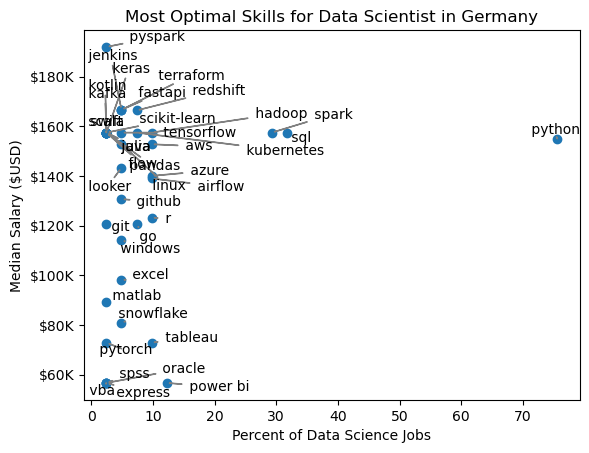

In [41]:
from adjustText import adjust_text

plt.scatter(df_germ_skills['skill_percent'], df_germ_skills['median_salary'])
plt.xlabel('Percent of Data Science Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Scientist in Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_germ_skills.index):
    texts.append(plt.text(df_germ_skills['skill_percent'].iloc[i], df_germ_skills['median_salary'].iloc[i], " " + txt))

 #Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(color='gray'))

plt.show()